# Import libraries

In [1]:
import requests
import json
import pandas as pd

### URL Indicator Info JSON and pages 
(There are 330 pages in total)

In [2]:
url_grl ="http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&page="

### Accessing all pages

*pages* is a range from 1 to 330
<br>
*urls* is a list, it contains *url_grl* + *page* in *pages*
<br>
*all_pages_data* is a list, it contains a list with info from JSON API

In [3]:
pages = range(1,331)
urls = []
all_pages_data = []

In [4]:
for page in pages:
    urls.append(url_grl+str(page))

In [5]:
for url in urls:
    all_pages_data.append(requests.get(url).json())

Cada dict con info contiene: 
<br>

<p style="text-align: center;">
    indicador -> [dict con id y value] indicator id Total population
    <br>
    country -> [dict con id y value] Country id, country name
    <br>
    countryiso3code -> [str] code
    <br>
    date -> [str] year
    <br>
    value -> [int] total population
    <br>
</p>

In [39]:
list_countries = []

In [40]:
for i in range(0,329):
    for j in range (0,50):
        if all_pages_data[i][1][j]['country']['value'] not in list_countries:
            list_countries.append(all_pages_data[i][1][j]['country']['value'])

In [41]:
series_countries = pd.Series(list_countries)

In [42]:
list_years = []

In [43]:
for i in range(0,329):
    for j in range (0,50):
        if all_pages_data[i][1][j]['date'] not in list_years:
            list_years.append(all_pages_data[i][1][j]['date'])

In [44]:
series_year = pd.Series(list_years)

In [45]:
list_dicts_per_year = []
for year in series_year:
    list_dicts_per_year.append({})

In [60]:
len(all_pages_data)

330

In [75]:
for i_year in range(len(series_year)):
    for i_pages in range(0, 330):
        for i_page in range(0, len(all_pages_data[i_pages][1])):
            if all_pages_data[i_pages][1][i_page]['date']==series_year[i_year]:
                list_dicts_per_year[i_year].update({
                    all_pages_data[i_pages][1][i_page]['country']['value'] : all_pages_data[i_pages][1][i_page]['value']
                })

In [77]:
dict_info_per_year = dict()

In [78]:
for i_year in range(len(series_year)):
    for info in list_dicts_per_year[i_year]:
        dict_info_per_year.update({
            series_year[i_year] : pd.Series(list_dicts_per_year[i_year])
        })

In [79]:
dict_info_per_year

{'2021': Africa Eastern and Southern       702976832.0
 Africa Western and Central        478185907.0
 Arab World                        456520777.0
 Caribbean small states              7481877.0
 Central Europe and the Baltics    101430997.0
                                      ...     
 Virgin Islands (U.S.)                105870.0
 West Bank and Gaza                  4922749.0
 Yemen, Rep.                        32981641.0
 Zambia                             19473125.0
 Zimbabwe                           15993524.0
 Length: 266, dtype: float64,
 '2020': Africa Eastern and Southern       685112705.0
 Africa Western and Central        466189102.0
 Arab World                        449228296.0
 Caribbean small states              7444768.0
 Central Europe and the Baltics    102180124.0
                                      ...     
 Virgin Islands (U.S.)                106290.0
 West Bank and Gaza                  4803269.0
 Yemen, Rep.                        32284046.0
 Zambia       

In [80]:
Indicators_DataFrame = pd.DataFrame(dict_info_per_year)

Para cada una de las paginas data_per_page (estas son listas, que contienen 1 diccionario con la info de cada pag y 1 lista con de los indicadores)
<br>
Hay que acceder a data_per_page \[ 1: \], esa es la info que estará en 

In [121]:
Indicators_DataFrame['1960'][-4:]

West Bank and Gaza          NaN
Yemen, Rep.           5542459.0
Zambia                3119430.0
Zimbabwe              3806310.0
Name: 1960, dtype: float64

In [139]:
Indicators_DataFrame['2021']

Africa Eastern and Southern       702976832.0
Africa Western and Central        478185907.0
Arab World                        456520777.0
Caribbean small states              7481877.0
Central Europe and the Baltics    101430997.0
                                     ...     
Virgin Islands (U.S.)                105870.0
West Bank and Gaza                  4922749.0
Yemen, Rep.                        32981641.0
Zambia                             19473125.0
Zimbabwe                           15993524.0
Name: 2021, Length: 266, dtype: float64

In [142]:
Indicators_DataFrame.describe()

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
count,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,3.223248e+08,3.190983e+08,3.155191e+08,3.118393e+08,3.080704e+08,3.042155e+08,3.003545e+08,2.964856e+08,2.925870e+08,2.886995e+08,...,1.408128e+08,1.377713e+08,1.348350e+08,1.319789e+08,1.291211e+08,1.263792e+08,1.236763e+08,1.209957e+08,1.188268e+08,1.172187e+08
std,1.004098e+09,9.950997e+08,9.850384e+08,9.745580e+08,9.637185e+08,9.525129e+08,9.412781e+08,9.299558e+08,9.184860e+08,9.070053e+08,...,4.450496e+08,4.350875e+08,4.255158e+08,4.162308e+08,4.069033e+08,3.980380e+08,3.893042e+08,3.806132e+08,3.738947e+08,3.693371e+08
min,1.120400e+04,1.106900e+04,1.095600e+04,1.086500e+04,1.082800e+04,1.085200e+04,1.087700e+04,1.089900e+04,1.069400e+04,1.044400e+04,...,5.646000e+03,5.354000e+03,4.930000e+03,4.531000e+03,4.161000e+03,3.811000e+03,3.481000e+03,3.171000e+03,2.888000e+03,2.646000e+03
25%,1.786038e+06,1.790133e+06,1.788878e+06,1.797085e+06,1.791003e+06,1.777557e+06,1.788196e+06,1.743309e+06,1.697753e+06,1.652717e+06,...,5.875942e+05,5.832700e+05,5.773872e+05,5.691470e+05,5.651150e+05,5.566630e+05,5.449288e+05,5.337595e+05,5.231345e+05,5.132212e+05
50%,1.050577e+07,1.060623e+07,1.044767e+07,1.039533e+07,1.030030e+07,1.032545e+07,1.035808e+07,1.028212e+07,1.014958e+07,9.920362e+06,...,4.530800e+06,4.450934e+06,4.385700e+06,4.331825e+06,4.277636e+06,4.224612e+06,4.139356e+06,4.023896e+06,3.887144e+06,3.757486e+06
75%,6.358833e+07,6.170452e+07,5.987258e+07,6.042176e+07,6.053671e+07,6.062750e+07,6.073058e+07,6.078914e+07,6.023395e+07,5.953972e+07,...,3.277149e+07,3.249927e+07,3.209247e+07,3.163010e+07,3.084892e+07,3.001684e+07,2.914708e+07,2.830289e+07,2.748694e+07,2.670606e+07
max,7.888409e+09,7.820982e+09,7.742682e+09,7.661776e+09,7.578158e+09,7.491934e+09,7.404911e+09,7.317509e+09,7.229185e+09,7.140896e+09,...,3.614669e+09,3.540255e+09,3.468457e+09,3.398561e+09,3.328285e+09,3.260518e+09,3.193509e+09,3.126935e+09,3.072511e+09,3.031565e+09


<AxesSubplot:>

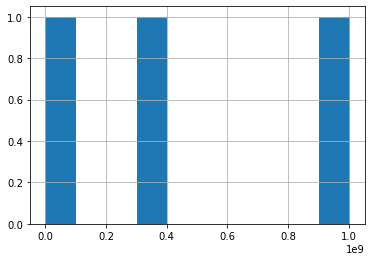

In [146]:
Indicators_DataFrame.describe()['2021'][0:3].hist()

In [81]:
Indicators_DataFrame

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
Africa Eastern and Southern,702976832.0,685112705.0,667242712.0,649756874.0,632746296.0,616377331.0,600008150.0,583650827.0,567891875.0,552530654.0,...,167596160.0,162875171.0,158313235.0,153955516.0,149742351.0,145605995.0,141630546.0,137835590.0,134169237.0,130692579.0
Africa Western and Central,478185907.0,466189102.0,454306063.0,442646825.0,431138704.0,419778384.0,408690375.0,397855507.0,387204553.0,376797999.0,...,118615741.0,115921723.0,113319950.0,110798486.0,108336203.0,105959979.0,103667517.0,101445032.0,99314028.0,97256290.0
Arab World,456520777.0,449228296.0,441467739.0,432545676.0,423664839.0,415077960.0,406501999.0,397922915.0,389131555.0,380383408.0,...,119061868.0,115729597.0,112499764.0,109394536.0,106444103.0,103618568.0,100892507.0,98268683.0,95760348.0,93359407.0
Caribbean small states,7481877.0,7444768.0,7424102.0,7374650.0,7303634.0,7265272.0,7224602.0,7181044.0,7135884.0,7088996.0,...,4883868.0,4813958.0,4743053.0,4670465.0,4596245.0,4520592.0,4443544.0,4366420.0,4289429.0,4209141.0
Central Europe and the Baltics,101430997.0,102180124.0,102398537.0,102538451.0,102740078.0,102994278.0,103257886.0,103496179.0,103713726.0,103935318.0,...,98606630.0,97884022.0,97043270.0,96146336.0,95440988.0,94715795.0,93840016.0,93009498.0,92232738.0,91401764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),105870.0,106290.0,106669.0,107001.0,107281.0,107516.0,107712.0,107882.0,108041.0,108188.0,...,60300.0,55700.0,49100.0,46200.0,43500.0,40800.0,39800.0,35000.0,34300.0,32500.0
West Bank and Gaza,4922749.0,4803269.0,4685306.0,4569087.0,4454805.0,4367088.0,4270092.0,4173398.0,4076708.0,3979998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",32981641.0,32284046.0,31546691.0,30790513.0,30034389.0,29274002.0,28516545.0,27753304.0,26984002.0,26223391.0,...,6673981.0,6515904.0,6368014.0,6228430.0,6097298.0,5973803.0,5860197.0,5753386.0,5646668.0,5542459.0
Zambia,19473125.0,18927715.0,18380477.0,17835893.0,17298054.0,16767761.0,16248230.0,15737793.0,15234976.0,14744658.0,...,4159007.0,4029173.0,3901288.0,3777680.0,3658024.0,3542764.0,3431381.0,3323427.0,3219451.0,3119430.0


In [157]:
type(Indicators_DataFrame)

pandas.core.frame.DataFrame

In [158]:
Indicators_DataFrame.loc['Mexico']

2021    126705138.0
2020    125998302.0
2019    125085311.0
2018    124013861.0
2017    122839258.0
           ...     
1964     41333878.0
1963     39982118.0
1962     38683283.0
1961     37439317.0
1960     36268055.0
Name: Mexico, Length: 62, dtype: float64

In [84]:
import wbgapi as wb
wb.data.DataFrame(['SP.POP.TOTL'])

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0,4922749.0


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
color = sns.color_palette()

In [97]:
color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [98]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [102]:
Indicators_DataFrame['2021']

Africa Eastern and Southern       702976832.0
Africa Western and Central        478185907.0
Arab World                        456520777.0
Caribbean small states              7481877.0
Central Europe and the Baltics    101430997.0
                                     ...     
Virgin Islands (U.S.)                105870.0
West Bank and Gaza                  4922749.0
Yemen, Rep.                        32981641.0
Zambia                             19473125.0
Zimbabwe                           15993524.0
Name: 2021, Length: 266, dtype: float64

In [104]:
Indicators_DataFrame['2021']

Africa Eastern and Southern       702976832.0
Africa Western and Central        478185907.0
Arab World                        456520777.0
Caribbean small states              7481877.0
Central Europe and the Baltics    101430997.0
                                     ...     
Virgin Islands (U.S.)                105870.0
West Bank and Gaza                  4922749.0
Yemen, Rep.                        32981641.0
Zambia                             19473125.0
Zimbabwe                           15993524.0
Name: 2021, Length: 266, dtype: float64

In [ ]:
dist = Indicators_DataFrame['2021'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabetes Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()